In [1]:
# =======================================================
# PART 1 — SCRAPE UNEMPLOYMENT ARTICLES & SAVE TO CSV
# Date: December 2025
# =======================================================

import requests
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 1. Guardian API setup
API_KEY = "e1e5019b-dbce-4ee0-aa9a-8199fb03591e"
BASE_URL = "https://content.guardianapis.com/search"

params = {
    "api-key": API_KEY,
    "q": "unemployment",
    "show-fields": "headline,bodyText",
    "page-size": 100
}

# 2. Request articles
response = requests.get(BASE_URL, params=params).json()
articles = response['response']['results']

# 3. Parse results into usable list
data = []

for a in articles:
    data.append([
        a['webPublicationDate'],
        a['webUrl'],
        a['fields'].get('headline', ''),
        a['fields'].get('bodyText', '')
    ])

# 4. Create dataframe
df = pd.DataFrame(data, columns=["date", "url", "title", "text"])

print(f"Scraped {len(df)} articles")

# 5. Save to CSV
df.to_csv("unemployment_articles.csv", index=False)

print("Saved to unemployment_articles.csv")


Scraped 100 articles
Saved to unemployment_articles.csv


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Loaded 100 articles
                                               title sentiment
0  ‘It’s so demoralising’: UK graduates exasperat...  Negative
1  Rising unemployment could affect budget, inter...  Positive
2  My cultural awakening: The Big Lebowski inspir...  Positive
3  UK unemployment rises to 5%, the highest level...  Negative
4  The ‘messy’ trend behind Australia’s rising un...  Positive


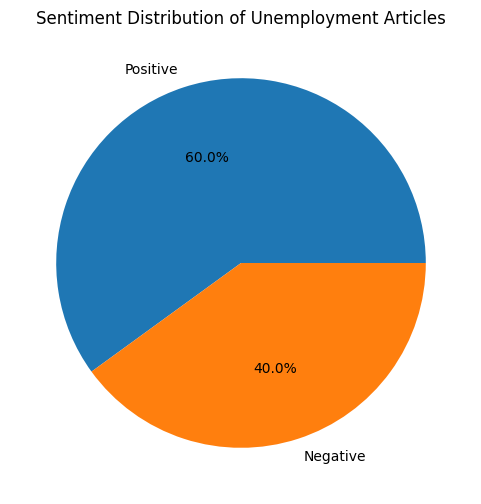

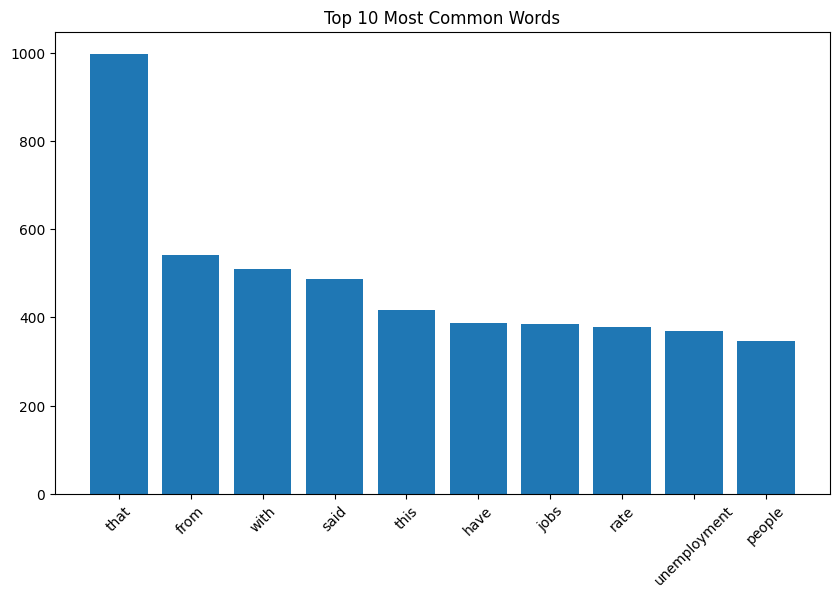

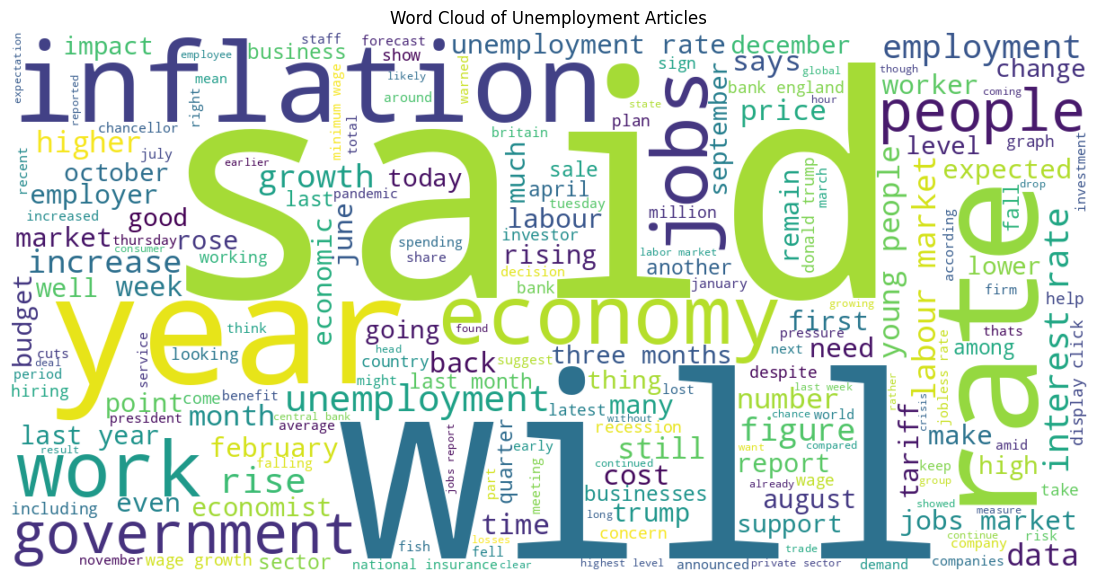

In [2]:
# =======================================================
# PART 2 — SENTIMENT ANALYSIS + VISUALIZATIONS
# =======================================================

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import re
import warnings
warnings.filterwarnings("ignore")

# Download NLTK sentiment model (if not already)
nltk.download("vader_lexicon")

# -------------------------------------------------------
# 1. Load data
# -------------------------------------------------------

df = pd.read_csv("unemployment_articles.csv")
print("Loaded", len(df), "articles")

# -------------------------------------------------------
# 2. Clean text
# -------------------------------------------------------

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

df['clean_text'] = df['text'].apply(clean_text)

# -------------------------------------------------------
# 3. Sentiment Analysis
# -------------------------------------------------------

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_text'].apply(get_sentiment)

print(df[['title', 'sentiment']].head())

# -------------------------------------------------------
# 4. Sentiment Pie Chart
# -------------------------------------------------------

counts = df['sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Sentiment Distribution of Unemployment Articles")
plt.show()

# -------------------------------------------------------
# 5. Top 10 Words Bar Chart
# -------------------------------------------------------

all_words = " ".join(df['clean_text']).split()
filtered = [w for w in all_words if len(w) > 3]  # remove short words

top10 = Counter(filtered).most_common(10)
words = [w for w, c in top10]
counts = [c for w, c in top10]

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title("Top 10 Most Common Words")
plt.xticks(rotation=45)
plt.show()

# -------------------------------------------------------
# 6. Word Cloud
# -------------------------------------------------------

wordcloud = WordCloud(width=1200, height=600,
                      background_color="white").generate(" ".join(filtered))

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Unemployment Articles")
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Loaded 100 articles
                                               title sentiment
0  ‘It’s so demoralising’: UK graduates exasperat...  Negative
1  Rising unemployment could affect budget, inter...  Positive
2  My cultural awakening: The Big Lebowski inspir...  Positive
3  UK unemployment rises to 5%, the highest level...  Negative
4  The ‘messy’ trend behind Australia’s rising un...  Positive


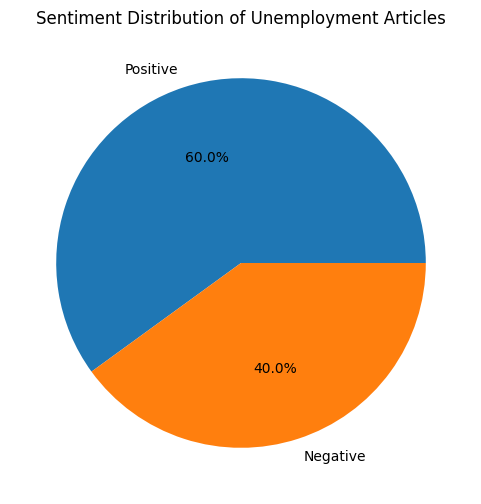

Saved: sentiment_pie.png


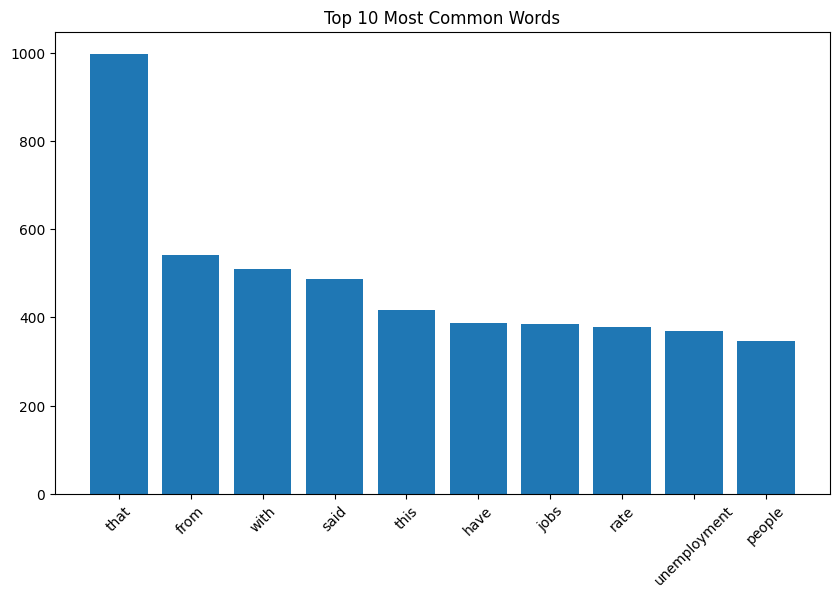

Saved: top10_words_bar.png


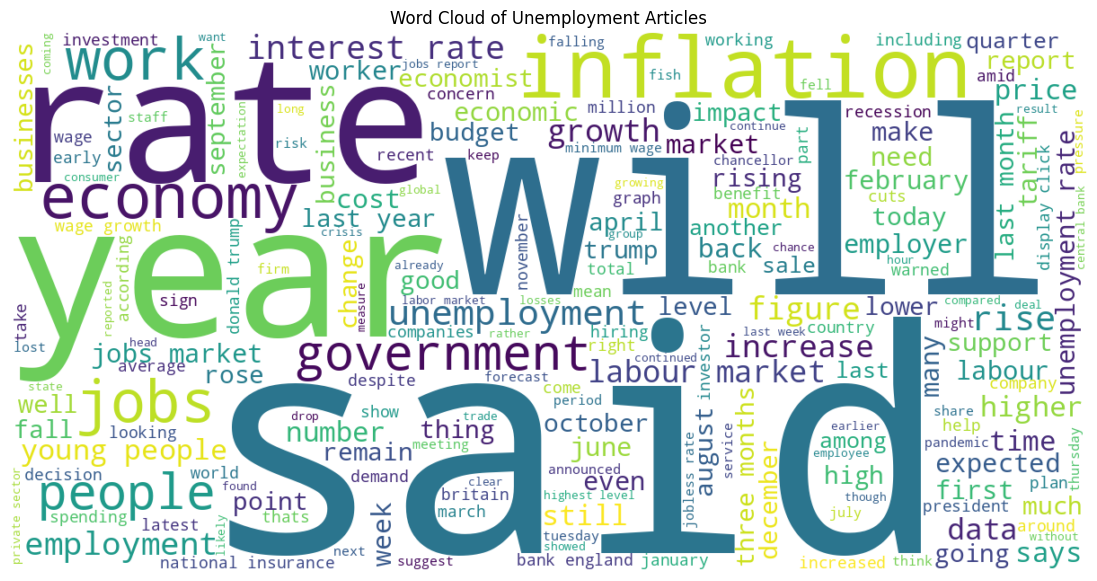

Saved: wordcloud.png


In [3]:
# =======================================================
# PART 2 — SENTIMENT ANALYSIS + VISUALIZATIONS (SAVE GRAPHS)
# Author: Dalmas
# Date: December 2025
# =======================================================

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import re
import warnings
warnings.filterwarnings("ignore")

# Download NLTK sentiment model
nltk.download("vader_lexicon")

# -------------------------------------------------------
# 1. Load CSV
# -------------------------------------------------------

df = pd.read_csv("unemployment_articles.csv")
print("Loaded", len(df), "articles")

# -------------------------------------------------------
# 2. Clean text
# -------------------------------------------------------

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

df['clean_text'] = df['text'].apply(clean_text)

# -------------------------------------------------------
# 3. Sentiment Analysis
# -------------------------------------------------------

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_text'].apply(get_sentiment)

print(df[['title', 'sentiment']].head())

# -------------------------------------------------------
# 4. Sentiment Pie Chart + Save
# -------------------------------------------------------

counts = df['sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Sentiment Distribution of Unemployment Articles")
plt.savefig("sentiment_pie.png", dpi=300, bbox_inches='tight')
plt.show()
print("Saved: sentiment_pie.png")

# -------------------------------------------------------
# 5. Top 10 Words Bar Chart + Save
# -------------------------------------------------------

all_words = " ".join(df['clean_text']).split()
filtered = [w for w in all_words if len(w) > 3]

top10 = Counter(filtered).most_common(10)
words = [w for w, c in top10]
counts = [c for w, c in top10]

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title("Top 10 Most Common Words")
plt.xticks(rotation=45)
plt.savefig("top10_words_bar.png", dpi=300, bbox_inches='tight')
plt.show()
print("Saved: top10_words_bar.png")

# -------------------------------------------------------
# 6. Word Cloud + Save
# -------------------------------------------------------

wordcloud = WordCloud(width=1200, height=600,
                      background_color="white").generate(" ".join(filtered))

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Unemployment Articles")
plt.savefig("wordcloud.png", dpi=300, bbox_inches='tight')
plt.show()
print("Saved: wordcloud.png")
